#Customer Segmentation Analysis
#####Created by Nikolas Rakryan Widagdo

In [175]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Data Pre-processing

###Loading necessary libraries

In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

###Loading the dataset

In [177]:
df=pd.read_csv("/content/drive/MyDrive/0projects/IYKRA DATA FELLOWSHIP/WORK/Machine Learning/ML_2_Fellow.csv", encoding= 'unicode_escape')

###Checking the dataset

In [178]:
df

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,12/9/2011 12:50,4.15,12680.0,France


In [179]:
df.Kode_Bayar.value_counts()

573585                                                                                            1101
581219                                                                                             742
581492                                                                                             720
580729                                                                                             716
558475                                                                                             689
                                                                                                  ... 
541219,21900,"KEY FOB , SHED",1,1/14/2011 14:06,1.63,,United Kingdom                                 1
C556877                                                                                              1
575851,21111,"SWISS ROLL TOWEL, CHOCOLATE  SPOTS",1,11/11/2011 12:13,2.95,14662,United Kingdom       1
542380                                                                   

###DataFrame repair
####There seems to be a problem in the dataframe in the Kode_Bayar column due to input mistake or other errors.
####We try to repair it.

In [180]:
#We create a new dataframe to recover error data, df_test
df_test=pd.DataFrame(df)
df_test=df_test.reset_index(drop=True)
df_test

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,12/9/2011 12:50,4.15,12680.0,France


In [181]:
#We create another dataframe containing empty values in column Kode_Pelanggan,empty
empty=df_test[pd.isna(df["Kode_Pelanggan"])]
empty=empty.reset_index(drop=True)
empty

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,"536381,82567,""AIRLINE LOUNGE,METAL SIGN"",2,12/...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"536394,21506,""FANCY FONT BIRTHDAY CARD, "",24,1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,536414,22139,NaN,56.0,12/1/2010 11:52,0.00,NaN,United Kingdom
3,"536477,22041,""RECORD FRAME 7"""" SINGLE SIZE "",4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"536520,22760,""TRAY, BREAKFAST IN BED"",1,12/1/2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
138722,581498,DOT,DOTCOM POSTAGE,1.0,12/9/2011 10:26,1714.17,NaN,United Kingdom
138723,"581501,22165,""DIAMANTE HEART SHAPED WALL MIRRO...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
138724,"581516,21111,""SWISS ROLL TOWEL, CHOCOLATE SPO...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
138725,"581538,85071C,""CHARLIE+LOLA""""EXTREMELY BUSY"""" ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [182]:
#Dropping rows with missing Kode_Pelanggan in df_test
df_test=df_test.dropna(subset=['Kode_Pelanggan'])
df_test=df_test.reset_index(drop=True)
df_test

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
403177,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,12/9/2011 12:50,0.85,12680.0,France
403178,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,12/9/2011 12:50,2.10,12680.0,France
403179,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,12/9/2011 12:50,4.15,12680.0,France
403180,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,12/9/2011 12:50,4.15,12680.0,France


In [183]:
#creating a list for a new column in empty dataframe
emp=[]
for i in empty.index:
  emp.append(len(empty.Kode_Bayar[i]))
emp

[82,
 86,
 6,
 88,
 82,
 93,
 93,
 85,
 86,
 78,
 85,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 77,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 

In [184]:
#Adding new column consisting of the length of values in the Kode_Bayar column
empty["length"]=emp
empty

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara,length
0,"536381,82567,""AIRLINE LOUNGE,METAL SIGN"",2,12/...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,82
1,"536394,21506,""FANCY FONT BIRTHDAY CARD, "",24,1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,86
2,536414,22139,NaN,56.0,12/1/2010 11:52,0.00,NaN,United Kingdom,6
3,"536477,22041,""RECORD FRAME 7"""" SINGLE SIZE "",4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,88
4,"536520,22760,""TRAY, BREAKFAST IN BED"",1,12/1/2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,82
...,...,...,...,...,...,...,...,...,...
138722,581498,DOT,DOTCOM POSTAGE,1.0,12/9/2011 10:26,1714.17,NaN,United Kingdom,6
138723,"581501,22165,""DIAMANTE HEART SHAPED WALL MIRRO...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,95
138724,"581516,21111,""SWISS ROLL TOWEL, CHOCOLATE SPO...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,94
138725,"581538,85071C,""CHARLIE+LOLA""""EXTREMELY BUSY"""" ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,95


In [185]:
#Create a new datafram empty_no for rows of dataframe that has no error of input in the Kode_Bayar column
empty_no=empty[empty.length<=7]
empty_no=empty_no.reset_index(drop=True)
empty_no

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara,length
0,536414,22139,NaN,56.0,12/1/2010 11:52,0.00,NaN,United Kingdom,6
1,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1.0,12/1/2010 14:32,2.51,NaN,United Kingdom,6
2,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2.0,12/1/2010 14:32,2.51,NaN,United Kingdom,6
3,536544,21786,POLKADOT RAIN HAT,4.0,12/1/2010 14:32,0.85,NaN,United Kingdom,6
4,536544,21787,RAIN PONCHO RETROSPOT,2.0,12/1/2010 14:32,1.66,NaN,United Kingdom,6
...,...,...,...,...,...,...,...,...,...
132687,581498,85099B,JUMBO BAG RED RETROSPOT,5.0,12/9/2011 10:26,4.13,NaN,United Kingdom,6
132688,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4.0,12/9/2011 10:26,4.13,NaN,United Kingdom,6
132689,581498,85150,LADIES & GENTLEMEN METAL SIGN,1.0,12/9/2011 10:26,4.96,NaN,United Kingdom,6
132690,581498,85174,S/4 CACTI CANDLES,1.0,12/9/2011 10:26,10.79,NaN,United Kingdom,6


In [186]:
#Create a new datafram empty_no for rows of dataframe that has error of input in the Kode_Bayar column
empty_yes=empty[empty.length>7]
empty_yes=empty_yes.reset_index(drop=True)
empty_yes

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara,length
0,"536381,82567,""AIRLINE LOUNGE,METAL SIGN"",2,12/...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,82
1,"536394,21506,""FANCY FONT BIRTHDAY CARD, "",24,1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,86
2,"536477,22041,""RECORD FRAME 7"""" SINGLE SIZE "",4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,88
3,"536520,22760,""TRAY, BREAKFAST IN BED"",1,12/1/2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,82
4,"536520,21111,""SWISS ROLL TOWEL, CHOCOLATE SPO...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,93
...,...,...,...,...,...,...,...,...,...
6030,"581498,22041,""RECORD FRAME 7"""" SINGLE SIZE "",2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,83
6031,"581501,22165,""DIAMANTE HEART SHAPED WALL MIRRO...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,95
6032,"581516,21111,""SWISS ROLL TOWEL, CHOCOLATE SPO...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,94
6033,"581538,85071C,""CHARLIE+LOLA""""EXTREMELY BUSY"""" ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,95


In [187]:
#Checking values for Kode_Bayar in empty_yes dataframe
for i in empty_yes.index:
  print(empty_yes.Kode_Bayar[i])

Streaming output truncated to the last 5000 lines.
541595,90214R,"LETTER ""R"" BLING KEY RING",1,1/19/2011 16:08,1.25,14606,United Kingdom
541596,21112,"SWISS ROLL TOWEL, PINK  SPOTS",24,1/19/2011 16:19,1.25,17602,United Kingdom
541604,51014L,"FEATHER PEN,LIGHT PINK",24,1/19/2011 17:23,0.85,14572,United Kingdom
541631,21507,"ELEPHANT, BIRTHDAY CARD, ",12,1/20/2011 10:48,0.42,12637,France
541648,84212,"ASSORTED FLOWER COLOUR ""LEIS""",6,1/20/2011 11:15,0.65,17811,United Kingdom
541676,21506,"FANCY FONT BIRTHDAY CARD, ",12,1/20/2011 14:01,0.42,15379,United Kingdom
541681,22287,"DECORATION , WOBBLY CHICKEN, METAL ",12,1/20/2011 14:24,1.65,13008,United Kingdom
541681,22286,"DECORATION , WOBBLY RABBIT , METAL ",12,1/20/2011 14:24,1.65,13008,United Kingdom
541684,22041,"RECORD FRAME 7"" SINGLE SIZE ",6,1/20/2011 15:22,2.55,15498,United Kingdom
541684,21900,"KEY FOB , SHED",10,1/20/2011 15:22,0.65,15498,United Kingdom
541684,21902,"KEY FOB , FRONT  DOOR ",10,1/20/2011 15:22,0.65,15498,United 

In [188]:
#Creating a list consisted of the error values in Kode_Bayar column in the empty_yes dataframe
comp_list=[]

for i in empty_yes.index:
    comp_list.append((empty_yes.Kode_Bayar[i].split(",")))
    
print(comp_list)

[['536381', '82567', '"AIRLINE LOUNGE', 'METAL SIGN"', '2', '12/1/2010 9:41', '2.1', '15311', 'United Kingdom'], ['536394', '21506', '"FANCY FONT BIRTHDAY CARD', ' "', '24', '12/1/2010 10:39', '0.42', '13408', 'United Kingdom'], ['536477', '22041', '"RECORD FRAME 7"" SINGLE SIZE "', '48', '12/1/2010 12:27', '2.1', '16210', 'United Kingdom'], ['536520', '22760', '"TRAY', ' BREAKFAST IN BED"', '1', '12/1/2010 12:43', '12.75', '14729', 'United Kingdom'], ['536520', '21111', '"SWISS ROLL TOWEL', ' CHOCOLATE  SPOTS"', '1', '12/1/2010 12:43', '2.95', '14729', 'United Kingdom'], ['536524', '21111', '"SWISS ROLL TOWEL', ' CHOCOLATE  SPOTS"', '6', '12/1/2010 12:51', '2.95', '17572', 'United Kingdom'], ['536531', '22819', '"BIRTHDAY CARD', ' RETRO SPOT"', '24', '12/1/2010 13:23', '0.42', '15485', 'United Kingdom'], ['536531', '21506', '"FANCY FONT BIRTHDAY CARD', ' "', '24', '12/1/2010 13:23', '0.42', '15485', 'United Kingdom'], ['536532', '21506', '"FANCY FONT BIRTHDAY CARD', ' "', '12', '12/1/

In [189]:
#Cleaning comp_list

for i in range(len(comp_list)):
  if len(comp_list[i]) ==8:
    comp_list[i][2]=comp_list[i][2].strip('"').rstrip()
  elif len(comp_list[i]) == 9 :
    comp_list[i][2] = comp_list[i][2]+" "+comp_list[i][3]
    comp_list[i].pop(3)
    comp_list[i][2]=comp_list[i][2].strip('"').rstrip()
  else:
    comp_list[i][2] = comp_list[i][2]+" "+comp_list[i][3]+" "+comp_list[i][4]
    comp_list[i].pop(3)
    comp_list[i].pop(3)
    comp_list[i][2]=comp_list[i][2].strip('"').rstrip()
print(comp_list)

[['536381', '82567', 'AIRLINE LOUNGE METAL SIGN', '2', '12/1/2010 9:41', '2.1', '15311', 'United Kingdom'], ['536394', '21506', 'FANCY FONT BIRTHDAY CARD', '24', '12/1/2010 10:39', '0.42', '13408', 'United Kingdom'], ['536477', '22041', 'RECORD FRAME 7"" SINGLE SIZE', '48', '12/1/2010 12:27', '2.1', '16210', 'United Kingdom'], ['536520', '22760', 'TRAY  BREAKFAST IN BED', '1', '12/1/2010 12:43', '12.75', '14729', 'United Kingdom'], ['536520', '21111', 'SWISS ROLL TOWEL  CHOCOLATE  SPOTS', '1', '12/1/2010 12:43', '2.95', '14729', 'United Kingdom'], ['536524', '21111', 'SWISS ROLL TOWEL  CHOCOLATE  SPOTS', '6', '12/1/2010 12:51', '2.95', '17572', 'United Kingdom'], ['536531', '22819', 'BIRTHDAY CARD  RETRO SPOT', '24', '12/1/2010 13:23', '0.42', '15485', 'United Kingdom'], ['536531', '21506', 'FANCY FONT BIRTHDAY CARD', '24', '12/1/2010 13:23', '0.42', '15485', 'United Kingdom'], ['536532', '21506', 'FANCY FONT BIRTHDAY CARD', '12', '12/1/2010 13:24', '0.42', '12433', 'Norway'], ['536540

In [190]:
#Creating a new dataframe from the list
df_1=pd.DataFrame(comp_list, columns=['Kode_Bayar', 'Kode_Barang', 'Barang', 'Jumlah', 'Tanggal_Transaksi',
       'Harga_Satuan', 'Kode_Pelanggan', 'Negara'])
df_1

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536381,82567,AIRLINE LOUNGE METAL SIGN,2,12/1/2010 9:41,2.1,15311,United Kingdom
1,536394,21506,FANCY FONT BIRTHDAY CARD,24,12/1/2010 10:39,0.42,13408,United Kingdom
2,536477,22041,"RECORD FRAME 7"""" SINGLE SIZE",48,12/1/2010 12:27,2.1,16210,United Kingdom
3,536520,22760,TRAY BREAKFAST IN BED,1,12/1/2010 12:43,12.75,14729,United Kingdom
4,536520,21111,SWISS ROLL TOWEL CHOCOLATE SPOTS,1,12/1/2010 12:43,2.95,14729,United Kingdom
...,...,...,...,...,...,...,...,...
6030,581498,22041,"RECORD FRAME 7"""" SINGLE SIZE",2,12/9/2011 10:26,5.79,,United Kingdom
6031,581501,22165,DIAMANTE HEART SHAPED WALL MIRROR,12,12/9/2011 10:46,3.95,12985,United Kingdom
6032,581516,21111,SWISS ROLL TOWEL CHOCOLATE SPOTS,24,12/9/2011 11:26,1.25,14422,United Kingdom
6033,581538,85071C,"CHARLIE+LOLA""""EXTREMELY BUSY"""" SIGN",1,12/9/2011 11:34,0.39,14446,United Kingdom


In [191]:
#Combining dataframes df_1 and empty_no
df_2 = pd.concat([df_1, empty_no.iloc[:,0:7]], ignore_index=True)
df_2

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536381,82567,AIRLINE LOUNGE METAL SIGN,2,12/1/2010 9:41,2.1,15311,United Kingdom
1,536394,21506,FANCY FONT BIRTHDAY CARD,24,12/1/2010 10:39,0.42,13408,United Kingdom
2,536477,22041,"RECORD FRAME 7"""" SINGLE SIZE",48,12/1/2010 12:27,2.1,16210,United Kingdom
3,536520,22760,TRAY BREAKFAST IN BED,1,12/1/2010 12:43,12.75,14729,United Kingdom
4,536520,21111,SWISS ROLL TOWEL CHOCOLATE SPOTS,1,12/1/2010 12:43,2.95,14729,United Kingdom
...,...,...,...,...,...,...,...,...
138722,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,NaN
138723,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,NaN
138724,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,NaN
138725,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,NaN


In [192]:
#Combining repair dataframe with the original dataframe df_test
dfnew = pd.concat([df_test, df_2], ignore_index=True)
dfnew

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,NaN
541905,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,NaN
541906,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,NaN
541907,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,NaN


In [193]:
dfnew.columns

Index(['Kode_Bayar', 'Kode_Barang', 'Barang', 'Jumlah', 'Tanggal_Transaksi',
       'Harga_Satuan', 'Kode_Pelanggan', 'Negara'],
      dtype='object')

In [194]:
dfnew.Barang

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904                JUMBO BAG RED RETROSPOT
541905         JUMBO  BAG BAROQUE BLACK WHITE
541906          LADIES & GENTLEMEN METAL SIGN
541907                      S/4 CACTI CANDLES
541908                         DOTCOM POSTAGE
Name: Barang, Length: 541909, dtype: object

In [195]:
dfnew.describe()

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
count,541909,541909,540455,541909.0,541909,541909.00,409217.0,409217
unique,25900,4070,4221,794.0,23260,1702.00,5530.0,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1.0,10/31/2011 14:41,1.25,17841.0,United Kingdom
freq,1114,2313,2369,146029.0,1114,50274.00,7890.0,364262


In [196]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Kode_Bayar         541909 non-null  object
 1   Kode_Barang        541909 non-null  object
 2   Barang             540455 non-null  object
 3   Jumlah             541909 non-null  object
 4   Tanggal_Transaksi  541909 non-null  object
 5   Harga_Satuan       541909 non-null  object
 6   Kode_Pelanggan     409217 non-null  object
 7   Negara             409217 non-null  object
dtypes: object(8)
memory usage: 33.1+ MB


In [197]:
#assigning new data types
dfnew["Jumlah"] = dfnew["Jumlah"].astype('int64')
print("dfnew.Jumlah.dtype",dfnew["Jumlah"].dtype)
dfnew["Harga_Satuan"] = dfnew["Harga_Satuan"].astype('float64')
print("dfnew.Harga_Satuan.dtype",dfnew["Harga_Satuan"].dtype)

dfnew["Kode_Bayar"] = dfnew["Kode_Bayar"].astype('str')
print("dfnew.Kode_Bayar.dtype",dfnew["Kode_Bayar"].dtype)

dfnew["Kode_Barang"] = dfnew["Kode_Barang"].astype('str')
print("dfnew.Kode_Barang.dtype",dfnew["Kode_Barang"].dtype)

dfnew["Barang"] = dfnew["Barang"].astype('str')
print("dfnew.Barang.dtype",dfnew["Barang"].dtype)

dfnew["Tanggal_Transaksi"] = dfnew["Tanggal_Transaksi"].astype('str')
print("dfnew.Tanggal_Transaksi.dtype",dfnew["Tanggal_Transaksi"].dtype)

dfnew["Negara"] = dfnew["Negara"].astype('str')
print("dfnew.Negara.dtype",dfnew["Negara"].dtype)


dfnew.Jumlah.dtype int64
dfnew.Harga_Satuan.dtype float64
dfnew.Kode_Bayar.dtype object
dfnew.Kode_Barang.dtype object
dfnew.Barang.dtype object
dfnew.Tanggal_Transaksi.dtype object
dfnew.Negara.dtype object


In [198]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Kode_Bayar         541909 non-null  object 
 1   Kode_Barang        541909 non-null  object 
 2   Barang             541909 non-null  object 
 3   Jumlah             541909 non-null  int64  
 4   Tanggal_Transaksi  541909 non-null  object 
 5   Harga_Satuan       541909 non-null  float64
 6   Kode_Pelanggan     409217 non-null  object 
 7   Negara             541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


In [199]:
#Cleaning Kode_Bayar values
dfnew = dfnew[~dfnew.Kode_Bayar.str.contains("C", na=False)]
dfnew['Kode_Bayar'].str.contains("C").value_counts()/dfnew.shape[0]*100

False    100.0
Name: Kode_Bayar, dtype: float64

In [200]:
#Cleaning negative values
dfnew["Jumlah"] = dfnew["Jumlah"].astype(str)
dfnew = dfnew[~dfnew.Jumlah.str.contains("-", na=False)]
print(dfnew['Jumlah'].str.contains("-").value_counts()/dfnew.shape[0]*100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


False    100.0
Name: Jumlah, dtype: float64


In [201]:
#Changing the data type back to integer
dfnew["Jumlah"] = dfnew["Jumlah"].astype('int64')
dfnew["Jumlah"].dtype

dtype('int64')

###Checking columns for missing values in the dataset

In [202]:
dfnew.columns

Index(['Kode_Bayar', 'Kode_Barang', 'Barang', 'Jumlah', 'Tanggal_Transaksi',
       'Harga_Satuan', 'Kode_Pelanggan', 'Negara'],
      dtype='object')

In [203]:
dfnew.isna().sum()

Kode_Bayar                0
Kode_Barang               0
Barang                    0
Jumlah                    0
Tanggal_Transaksi         0
Harga_Satuan              0
Kode_Pelanggan       130986
Negara                    0
dtype: int64

In [204]:
dfnew.columns[dfnew.isnull().any()]

Index(['Kode_Pelanggan'], dtype='object')

In [205]:
#counting missing values in columns in percentage
misspercent=round(dfnew.isna().mean()*100,2).sort_values(ascending=False)
misspercent=misspercent[misspercent>0]
misspercent

Kode_Pelanggan    24.65
dtype: float64

###Dealing with missing variables

In [206]:
dfnew.columns[dfnew.isnull().any()]

Index(['Kode_Pelanggan'], dtype='object')

In [207]:
dfnew.Negara.value_counts()

United Kingdom          356716
nan                     130986
Germany                   9042
France                    8342
EIRE                      7239
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1462
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon 

In [208]:
dfnew.Negara = dfnew.Negara.replace({"nan":"United Kingdom"})
dfnew.Barang = dfnew.Barang.replace({"nan":"WHITE HANGING HEART T-LIGHT HOLDER"})

In [209]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531285 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Kode_Bayar         531285 non-null  object 
 1   Kode_Barang        531285 non-null  object 
 2   Barang             531285 non-null  object 
 3   Jumlah             531285 non-null  int64  
 4   Tanggal_Transaksi  531285 non-null  object 
 5   Harga_Satuan       531285 non-null  float64
 6   Kode_Pelanggan     400299 non-null  object 
 7   Negara             531285 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 36.5+ MB


In [210]:
dfnew['Kode_Pelanggan'].mode()

0    17841
dtype: object

In [211]:
dfnew['Barang'].mode()

0    WHITE HANGING HEART T-LIGHT HOLDER
dtype: object

In [212]:
#imputing missing values
dfnew['Barang'] = dfnew['Barang'].fillna("WHITE HANGING HEART T-LIGHT HOLDER")
dfnew['Negara'] = dfnew['Negara'].fillna(dfnew['Negara'].mode())

dfnew['Kode_Pelanggan'] = dfnew['Kode_Pelanggan'].fillna(17841.0)

In [213]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531285 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Kode_Bayar         531285 non-null  object 
 1   Kode_Barang        531285 non-null  object 
 2   Barang             531285 non-null  object 
 3   Jumlah             531285 non-null  int64  
 4   Tanggal_Transaksi  531285 non-null  object 
 5   Harga_Satuan       531285 non-null  float64
 6   Kode_Pelanggan     531285 non-null  object 
 7   Negara             531285 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 36.5+ MB


In [214]:
dfnew.describe()

,Jumlah,Harga_Satuan
count,531285.000000,531285.000000
mean,10.655262,3.857296
std,156.830323,41.810047
min,1.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,13541.330000


In [215]:
#adding a new column to gain better understanding
for i in dfnew.items():
  ix=abs(dfnew['Jumlah'] * dfnew['Harga_Satuan'])
  dfnew["Total Sales"]=ix
dfnew


,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara,Total Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,17841,United Kingdom,20.65
541905,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,17841,United Kingdom,16.52
541906,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,17841,United Kingdom,4.96
541907,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,17841,United Kingdom,10.79


##Exploratory Data Analysis

###	1.	What items customers buy the most and are there any items we should ignore?

In [216]:
dfnew.Barang.value_counts().head(20)

WHITE HANGING HEART T-LIGHT HOLDER    2919
JUMBO BAG RED RETROSPOT               2115
REGENCY CAKESTAND 3 TIER              2019
PARTY BUNTING                         1707
LUNCH BAG RED RETROSPOT               1594
ASSORTED COLOUR BIRD ORNAMENT         1489
SET OF 3 CAKE TINS PANTRY DESIGN      1399
PACK OF 72 RETROSPOT CAKE CASES       1370
LUNCH BAG  BLACK SKULL.               1328
NATURAL SLATE HEART CHALKBOARD        1263
JUMBO BAG PINK POLKADOT               1238
HEART OF WICKER SMALL                 1226
PAPER CHAIN KIT 50'S CHRISTMAS        1200
JUMBO STORAGE BAG SUKI                1197
JUMBO SHOPPER VINTAGE RED PAISLEY     1190
LUNCH BAG SPACEBOY DESIGN             1179
LUNCH BAG CARS BLUE                   1174
JAM MAKING SET PRINTED                1169
SPOTTY BUNTING                        1160
JAM MAKING SET WITH JARS              1142
Name: Barang, dtype: int64

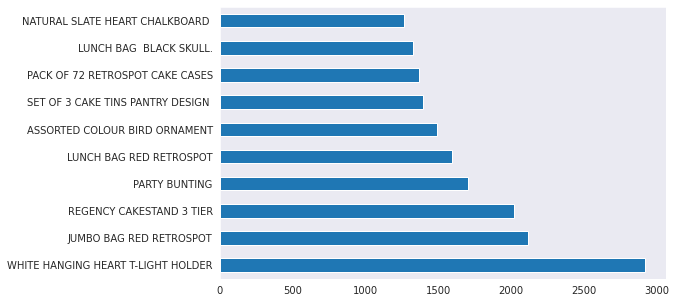

In [217]:
#items customers buy the most
plt.figure(figsize = (8,5))
most = dfnew.Barang.value_counts()
most = most.head(10)
most.plot(kind='barh')

In [218]:
#items customers buy we can ignore
dfnew.Barang.value_counts().tail(10)

MUMMY MOUSE RED GINGHAM RIBBON        1
ZINC STAR T-LIGHT HOLDER              1
LARGE HEART FLOWERS HOOK              1
JAM JAR WITH BLUE LID                 1
BLUE NEW BAROQUE FLOCK CANDLESTICK    1
FOUND                                 1
AMBER BERTIE MOBILE PHONE CHARM       1
Sale error                            1
BIRD ON BRANCH CANVAS SCREEN          1
 I LOVE LONDON MINI RUCKSACK          1
Name: Barang, dtype: int64

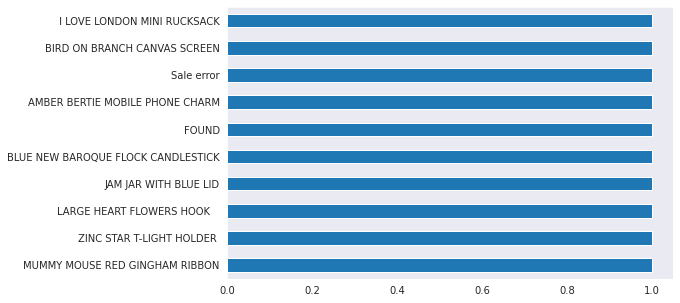

In [219]:
#items customers buy the most
plt.figure(figsize = (8,5))
least = dfnew.Barang.value_counts().tail(10)
#most = most.head(10)
least.plot(kind='barh')

###2.	What is our strategy to increase sales based on our export destination countries?

In [220]:
dfnew.Negara.value_counts()

United Kingdom          487702
Germany                   9042
France                    8342
EIRE                      7239
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1462
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45
Lithuani

In [221]:
df2=dfnew[["Barang","Negara","Jumlah"]]

df2=df2.groupby("Negara").agg(np.sum).sort_values(by=["Jumlah"],ascending=False)
df2

,Jumlah
Negara,
United Kingdom,4748705
Netherlands,200937
EIRE,140561
Germany,119263
France,111472
Australia,84209
Sweden,36083
Switzerland,30083
Spain,27951


In [222]:
dfnew["Total Sales"].describe()

count    531285.000000
mean         20.118785
std         270.906198
min           0.000000
25%           3.750000
50%           9.900000
75%          17.700000
max      168469.600000
Name: Total Sales, dtype: float64

In [223]:
dfnew["Total Sales"].head()

0    15.30
1    20.34
2    22.00
3    20.34
4    20.34
Name: Total Sales, dtype: float64

###3.	Do customer segmentation appropriately. Please explain in detail and completely.

In [224]:
#Selecting the relevant columns
df3 = dfnew[['Jumlah', 'Harga_Satuan', 'Negara',"Total Sales"]]
df3.head()

,Jumlah,Harga_Satuan,Negara,Total Sales
0,6,2.55,United Kingdom,15.30
1,6,3.39,United Kingdom,20.34
2,8,2.75,United Kingdom,22.00
3,6,3.39,United Kingdom,20.34
4,6,3.39,United Kingdom,20.34


In [225]:
df3=df3.groupby("Negara").agg(np.sum)
df3=df3.reset_index()
df3

,Negara,Jumlah,Harga_Satuan,Total Sales
0,Australia,84209,3.612500e+03,1.385213e+05
1,Austria,4881,1.693900e+03,1.019868e+04
2,Bahrain,260,7.895000e+01,5.484000e+02
3,Belgium,23237,7.372850e+03,4.119634e+04
4,Brazil,356,1.426000e+02,1.143600e+03
5,Canada,2763,9.105800e+02,3.666380e+03
6,Channel Islands,9491,3.389650e+03,2.045044e+04
7,Cyprus,6361,3.506180e+03,1.359038e+04
8,Czech Republic,671,7.827000e+01,8.267400e+02
9,Denmark,8235,1.195550e+03,1.895534e+04


In [226]:
#selecting data for train clustering
dfkmeans = dfnew[["Kode_Pelanggan","Jumlah","Harga_Satuan","Total Sales"]].groupby(["Kode_Pelanggan"])
dfkmeans = dfkmeans.sum()
dfkmeans = dfkmeans.reset_index()
dfkmeans

,Kode_Pelanggan,Jumlah,Harga_Satuan,Total Sales
0,12346,74215,1.04,77183.60
1,12347,2446,480.36,4299.80
2,12348,2341,178.71,1797.24
3,12349,631,605.10,1757.55
4,12350,197,65.30,334.40
...,...,...,...,...
5491,18229,96,4.60,160.80
5492,18232,4,4.95,19.80
5493,18239,12,1.65,19.80
5494,18245,52,6.63,39.96


In [227]:
dfkmeans = dfkmeans.iloc[:, 1:3]


In [228]:
dfkmeans

,Jumlah,Harga_Satuan
0,74215,1.04
1,2446,480.36
2,2341,178.71
3,631,605.10
4,197,65.30
...,...,...
5491,96,4.60
5492,4,4.95
5493,12,1.65
5494,52,6.63


In [229]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
dfkmeans = ss.fit_transform(dfkmeans)
dfkmeans = pd.DataFrame(dfkmeans,columns=['Jumlah','Harga_Satuan'])
dfkmeans

,Jumlah,Harga_Satuan
0,9.100089,-0.033501
1,0.176068,0.009684
2,0.163012,-0.017494
3,-0.049615,0.020922
4,-0.103581,-0.027711
...,...,...
5491,-0.116139,-0.033180
5492,-0.127579,-0.033149
5493,-0.126584,-0.033446
5494,-0.121610,-0.032997


In [230]:
df3_1=df3[['Jumlah', 'Harga_Satuan',"Total Sales"]]#

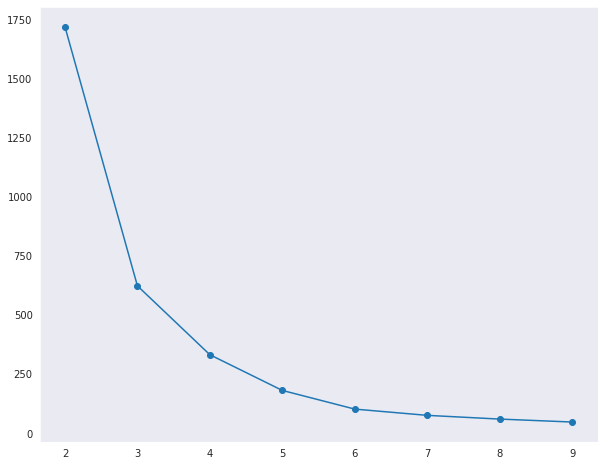

In [231]:
#Using elbow technique for determining number of cluster
inertias =[]

for c in range(2,10):
    kmeans = KMeans(n_clusters=c, random_state=1234).fit(dfkmeans)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10,8))
plt.plot(range(2,10),inertias, marker='o')

In [232]:
#KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(dfkmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [233]:
dfkmeans['cluster'] = kmeans.labels_
dfkmeans

,Jumlah,Harga_Satuan,cluster
0,9.100089,-0.033501,2
1,0.176068,0.009684,0
2,0.163012,-0.017494,0
3,-0.049615,0.020922,0
4,-0.103581,-0.027711,0
...,...,...,...
5491,-0.116139,-0.033180,0
5492,-0.127579,-0.033149,0
5493,-0.126584,-0.033446,0
5494,-0.121610,-0.032997,0


In [234]:
dfkmeans.columns

Index(['Jumlah', 'Harga_Satuan', 'cluster'], dtype='object')

In [235]:
dfkmeans.cluster.value_counts()

0    5481
2      14
1       1
Name: cluster, dtype: int64

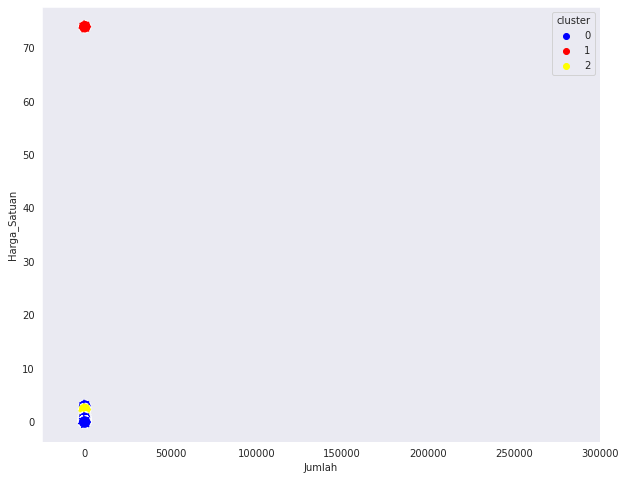

In [236]:
fig, ax = plt.subplots(figsize=(10,8))
plt.xlim(-25000, 300000)
sns.scatterplot(
    x="Jumlah", y="Harga_Satuan",
    hue='cluster',
    linestyle='--',
    data=dfkmeans,
    palette=['blue','red','yellow'],
    s=160,
    ax=ax
)

In [237]:
from sklearn.metrics import davies_bouldin_score 
labels = kmeans.labels_ 
print(davies_bouldin_score(dfkmeans, labels))

0.21893403163564


In [238]:
from sklearn.cluster import KMeans
kmeans = KMeans(init="random", n_clusters=3,n_init=10, max_iter=300, random_state=42)
kmeans.fit(dfkmeans)
labels = kmeans.labels_ 
print(davies_bouldin_score(dfkmeans, labels))

0.21893403163564


In [239]:
from sklearn.cluster import KMeans
kmeans = KMeans(init="random", n_clusters=4,n_init=10, max_iter=300, random_state=42)
kmeans.fit(dfkmeans)
labels = kmeans.labels_ 
print(davies_bouldin_score(dfkmeans, labels))

0.39208486817036226


In [240]:
from sklearn.cluster import KMeans
kmeans = KMeans(init="random", n_clusters=5,n_init=10, max_iter=300, random_state=42)
kmeans.fit(dfkmeans)
labels = kmeans.labels_ 
print(davies_bouldin_score(dfkmeans, labels))

0.4552479277698411


In [241]:
from sklearn.cluster import KMeans
kmeans = KMeans(init="random", n_clusters=6,n_init=10, max_iter=300, random_state=42)
kmeans.fit(dfkmeans)
labels = kmeans.labels_ 
print(davies_bouldin_score(dfkmeans, labels))

0.4999484440745929


In [242]:
dfkmeans=dfkmeans.sort_values(by=["cluster"])
dfkmeans

,Jumlah,Harga_Satuan,cluster
2747,-0.117258,-0.028765,0
3665,0.023747,-0.009091,0
3664,-0.109673,-0.027939,0
3663,0.465913,0.047968,0
3662,0.206160,0.066195,0
...,...,...,...
997,7.687670,0.046332,2
1689,24.207845,0.430973,2
5135,9.943139,-0.033407,2
1334,6.895849,0.446452,2


###4.	Get the hidden insight from the data 


In [243]:
dfnew.Tanggal_Transaksi=pd.to_datetime(dfnew.Tanggal_Transaksi)

In [244]:
#change date to month data
dfnew['Bulan_Transaksi']=dfnew['Tanggal_Transaksi'].dt.month

[Text(0.5, 1.0, 'Sales Month')]

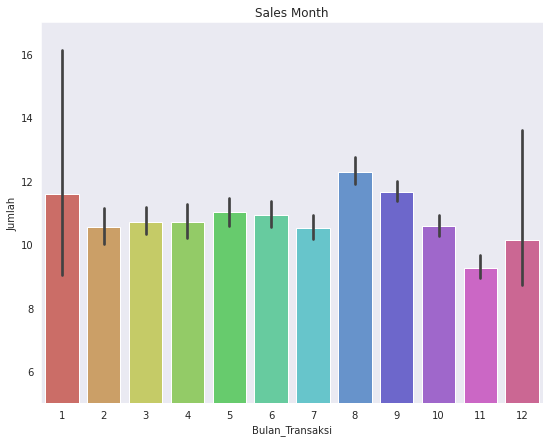

In [245]:
#plotting Bulan_Transaksi and Jumlah
fig= plt.figure(figsize=(9,7))
sns.set_style("dark")
plt.ylim(5, 17)
sns.barplot(data=dfnew, x="Bulan_Transaksi", y="Jumlah",palette = 'hls').set(title='Sales Month')

In [246]:
dfnew.Negara.value_counts(1)

United Kingdom          0.917967
Germany                 0.017019
France                  0.015702
EIRE                    0.013625
Spain                   0.004677
Netherlands             0.004448
Belgium                 0.003823
Switzerland             0.003467
Portugal                0.002752
Australia               0.002230
Norway                  0.002018
Italy                   0.001427
Channel Islands         0.001408
Finland                 0.001289
Cyprus                  0.001156
Sweden                  0.000849
Austria                 0.000749
Denmark                 0.000715
Poland                  0.000621
Japan                   0.000604
Israel                  0.000467
Unspecified             0.000459
Singapore               0.000418
Iceland                 0.000343
USA                     0.000337
Canada                  0.000284
Greece                  0.000273
Malta                   0.000211
United Arab Emirates    0.000128
European Community      0.000113
RSA       